<a href="https://colab.research.google.com/github/mostafa-ja/Machine-Learning-fall2023/blob/main/adversarial_Kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_train = datasets.MNIST("../data", train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST("../data", train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_train, batch_size = 100000, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 100000, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 90385124.80it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 8714798.12it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41357050.40it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18370808.84it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
X_train,y_train =next(iter(train_loader))
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [6]:
X_test,y_test =next(iter(test_loader))
print(X_test.shape)
print(y_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [8]:
# Function to calculate metrics for the model
def calculate_metrics(model,input,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))
 print('Silhouette : {}'.format(metrics.silhouette_score(input.view(input.shape[0], -1),model.labels_)))

In [10]:
def retrieve_info(model,y_train):

# Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(model.labels_))):
    index = np.where(model.labels_ == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [12]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = KMeans(init="k-means++", n_clusters=1024, n_init='auto', random_state=0)
#kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set
kmeans.fit(X_train.view(X_train.shape[0], -1))
# Calculating the metrics
calculate_metrics(kmeans,X_train.view(X_train.shape[0], -1),y_train)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(metrics.accuracy_score(number_labels,y_train)))
print('\n')

Number of clusters is 1024
Inertia : 1208294.084000147
Homogeneity : 0.9125335154576717
Silhouette : 0.044021379202604294


ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]

In [13]:
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(metrics.accuracy_score(number_labels,y_train)))
print('\n')

Accuracy score : 0.9433833333333334




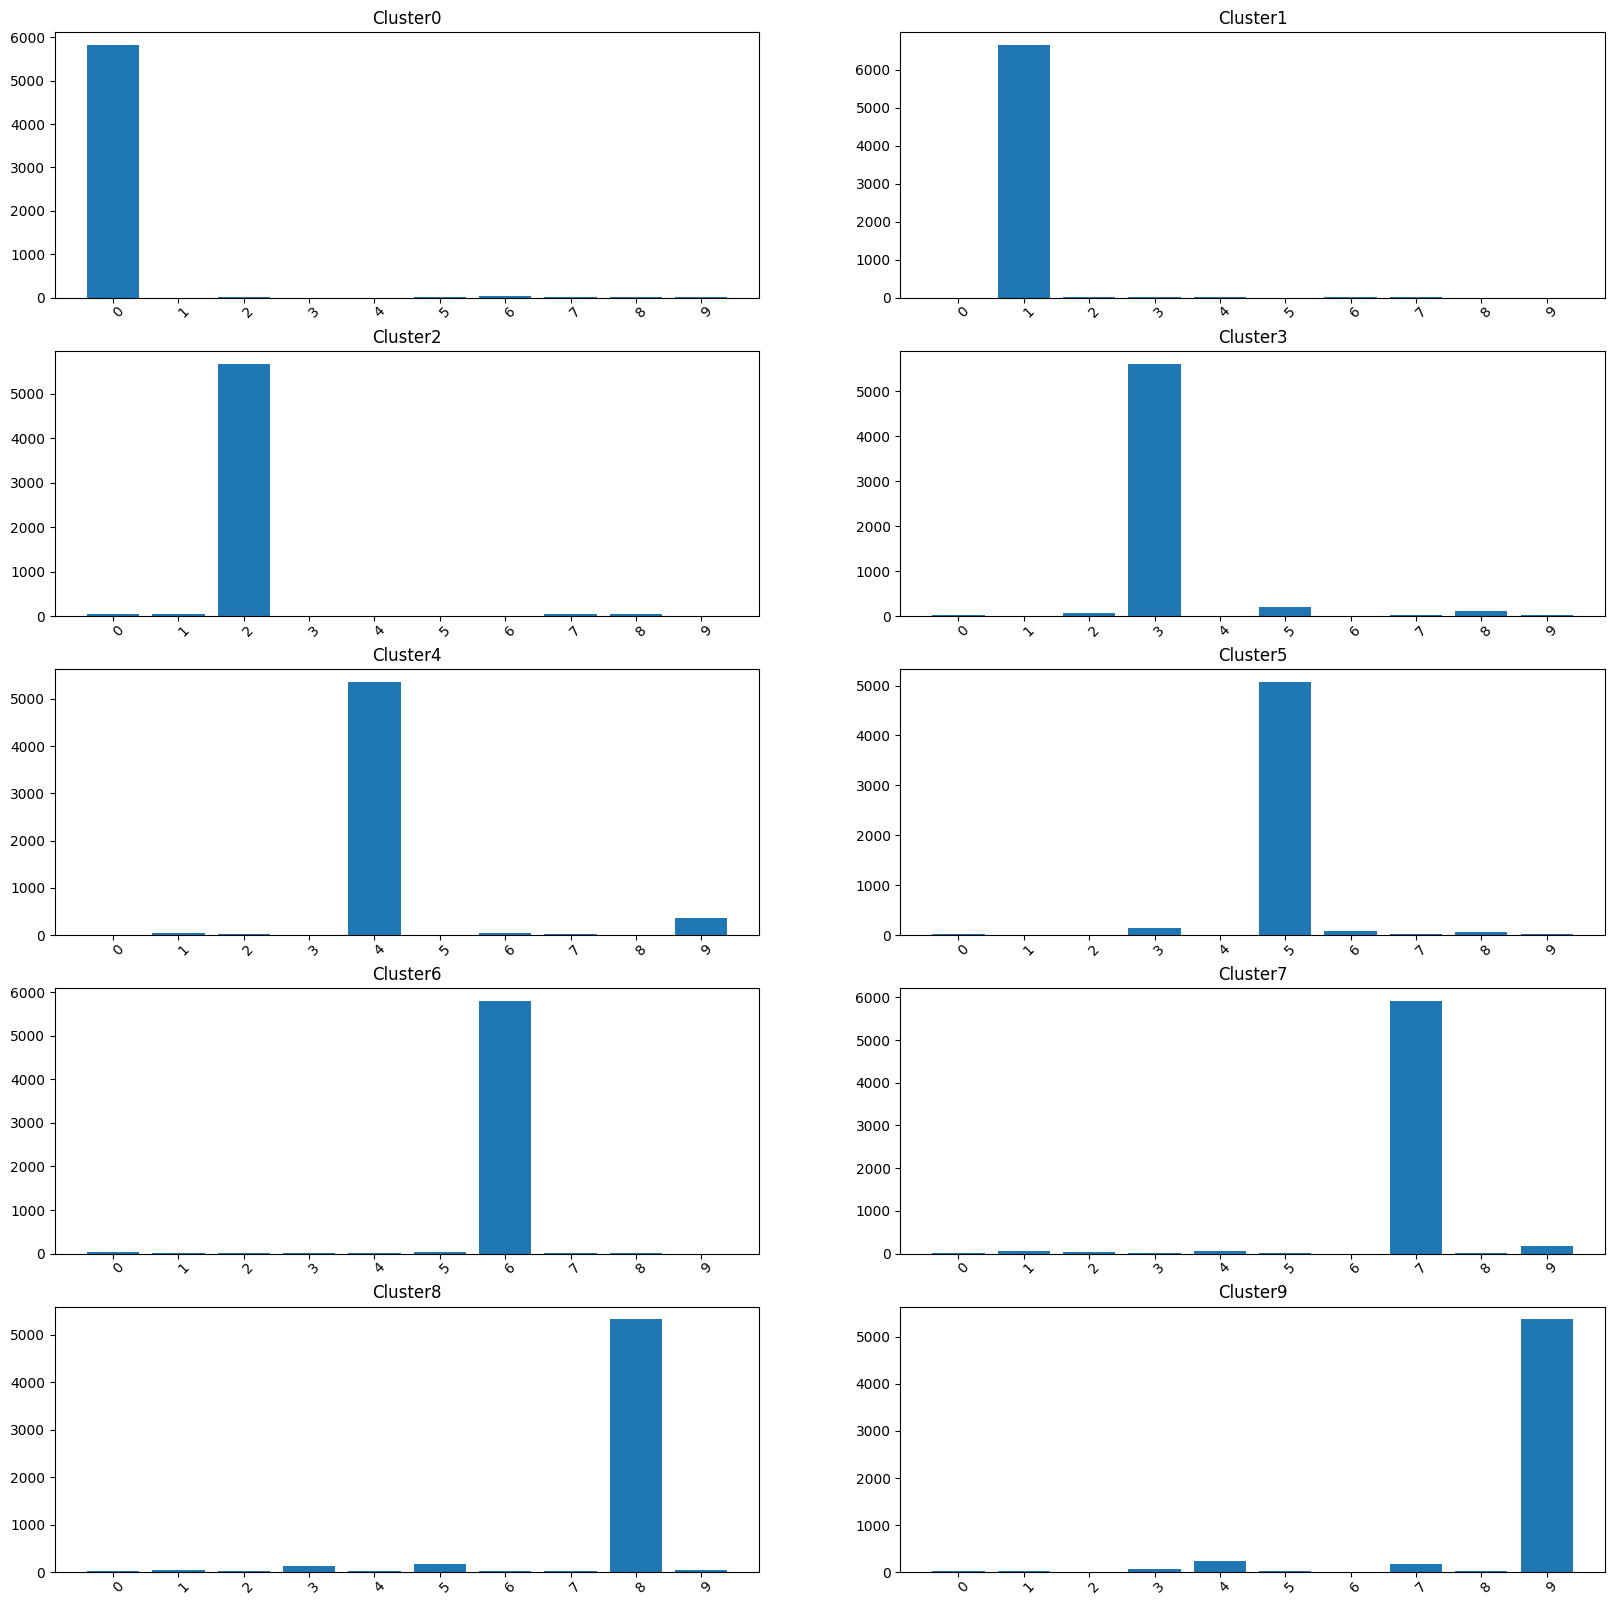

In [15]:
#Bar graph with the number of items of different categories clustered in it
plt.figure(figsize=(20,20))

# Create indices for each bar
indices = np.arange(10)

for i in range(10):
    plt.subplot(5, 2, i+1)
    counts = np.bincount(number_labels[y_train==i].astype(int), minlength = 10)
    plt.bar(indices, counts, align='center')
    plt.xticks(indices, indices, rotation=45, rotation_mode='anchor')
    plt.title("Cluster" + str(i))